In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
train = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_data = '/content/drive/MyDrive/MoneyClassify/Train_Data'
validation = ImageDataGenerator(rescale=1./255)
valid_data = '/content/drive/MyDrive/MoneyClassify/Valid_Data'

In [18]:
train_dataset = train.flow_from_directory(train_data, target_size = (150,150), batch_size = 10, class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(valid_data, target_size = (150,150), batch_size = 10, class_mode = 'categorical')

Found 46 images belonging to 11 classes.
Found 46 images belonging to 11 classes.


In [19]:
train_dataset.class_indices

{'100K': 0,
 '10K': 1,
 '1K': 2,
 '200': 3,
 '200K': 4,
 '20K': 5,
 '2K': 6,
 '500': 7,
 '500K': 8,
 '50K': 9,
 '5K': 10}

In [20]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform',))
model.add(Dense(11,activation='softmax'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 conv2d_11 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                  

In [22]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [23]:
history = model.fit(train_dataset,batch_size=32,epochs=40,verbose=1,validation_data=validation_dataset)

Epoch 1/40
5/5 [==============================] - 19s 4s/step - loss: 2.6530 - accuracy: 0.0652 - val_loss: 2.4834 - val_accuracy: 0.1087
Epoch 2/40
5/5 [==============================] - 1s 154ms/step - loss: 2.5521 - accuracy: 0.0870 - val_loss: 2.3743 - val_accuracy: 0.1087
Epoch 3/40
5/5 [==============================] - 1s 161ms/step - loss: 2.3781 - accuracy: 0.1304 - val_loss: 2.3266 - val_accuracy: 0.2174
Epoch 4/40
5/5 [==============================] - 1s 157ms/step - loss: 2.3518 - accuracy: 0.1522 - val_loss: 2.2984 - val_accuracy: 0.1304
Epoch 5/40
5/5 [==============================] - 1s 153ms/step - loss: 2.3071 - accuracy: 0.1739 - val_loss: 2.2624 - val_accuracy: 0.2174
Epoch 6/40
5/5 [==============================] - 1s 164ms/step - loss: 2.2717 - accuracy: 0.2609 - val_loss: 2.2036 - val_accuracy: 0.2609
Epoch 7/40
5/5 [==============================] - 1s 156ms/step - loss: 2.2083 - accuracy: 0.2391 - val_loss: 2.1011 - val_accuracy: 0.3043
Epoch 8/40
5/5 [======

In [24]:
model.save('/content/drive/MyDrive/MoneyClassify/MoneyClassify.h5')

In [25]:
moneyclassification_model = load_model('/content/drive/MyDrive/MoneyClassify/MoneyClassify.h5')

In [26]:
score=moneyclassification_model.evaluate(validation_dataset,verbose=1)
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

5/5 [==============================] - 0s 52ms/step - loss: 0.1995 - accuracy: 0.9565
Test loss =  0.19945260882377625
Test accuracy =  0.95652174949646


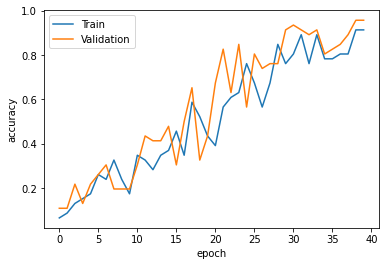

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

Tờ tiền này là:  2K


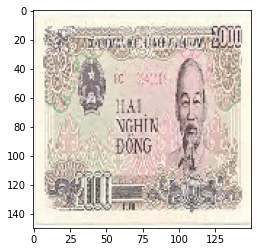

In [29]:
img = load_img('/content/drive/MyDrive/MoneyClassify/Pred_Data/2.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['100K','10K','1K','200','200K','20K','2K','500','500K','50K','5K']
print('Tờ tiền này là: ',Label[int(np.argmax(moneyclassification_model.predict(img),axis=-1))])

Tờ tiền này là:  500K


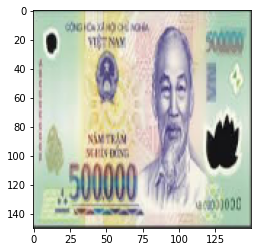

In [30]:
img = load_img('/content/drive/MyDrive/MoneyClassify/Pred_Data/5.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['100K','10K','1K','200','200K','20K','2K','500','500K','50K','5K']
print('Tờ tiền này là: ',Label[int(np.argmax(moneyclassification_model.predict(img),axis=-1))])

Tờ tiền này là:  500


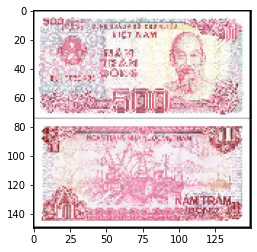

In [32]:
img = load_img('/content/drive/MyDrive/MoneyClassify/Pred_Data/8.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['100K','10K','1K','200','200K','20K','2K','500','500K','50K','5K']
print('Tờ tiền này là: ',Label[int(np.argmax(moneyclassification_model.predict(img),axis=-1))])

In [35]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('MoneyClassify.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File ‘colab_pdf.py’ already there; not retrieving.





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/MoneyClassify.ipynb to pdf
[NbConvertApp] Support files will be in MoneyClassify_files/
[NbConvertApp] Making directory ./MoneyClassify_files
[NbConvertApp] Making directory ./MoneyClassify_files
[NbConvertApp] Making directory ./MoneyClassify_files
[NbConvertApp] Making directory ./MoneyClassify_files
[NbConvertApp] Writing 52200 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 318224 bytes to /co

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'